<a href="https://colab.research.google.com/github/abhikbhattacharjee/Bayesian_Modelling_Dissertation/blob/main/Half_Moons_Data/Empirical_Comparison/EmpericalPriorComp_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepbayes

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import *
from keras.layers import *
import deepbayes
import deepbayes.optimizers as optimizers
import numpy as np
from deepbayes import PosteriorModel
import seaborn as sns

from matplotlib import font_manager
font_path = '/content/NewCM10-Regular.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [ ]:
def my_predict(model, input, n=35):
    if(model.det):
        return model.model(input)
    out = []
    for i in range(n):
        model.model.set_weights(model.sample())
        out.append(model.model(input).numpy())
    return np.mean(out,axis=0), np.var(out,axis=0)

<Axes: >

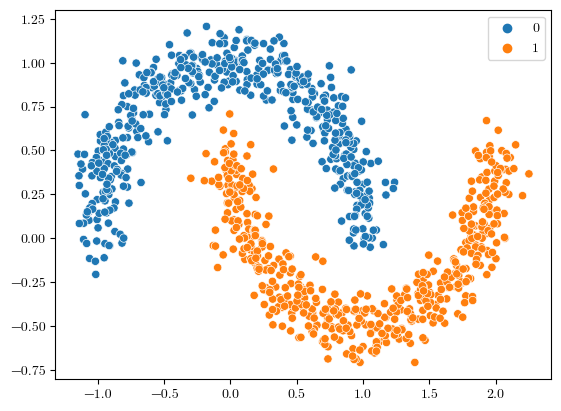

In [ ]:
n_samples = 1000
noise = 0.1
x, y = datasets.make_moons(n_samples = n_samples, noise = noise)

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='tab10')

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf_svc = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
clf_svc.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
y_pred = clf_svc.predict(x)

acc_scr = accuracy_score(y, y_pred)

print("Accuracy Score: ", acc_scr)

cnf_matrix = metrics.confusion_matrix(y, y_pred)
print("Confusion Matrix: \n", cnf_matrix)

Accuracy Score:  0.999
Confusion Matrix: 
 [[500   0]
 [  1 499]]


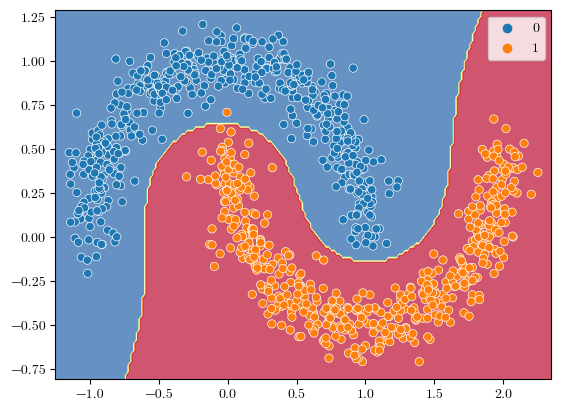

In [ ]:
h = 0.02
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral_r, alpha=0.8)
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='tab10')
plt.show()

<Axes: >

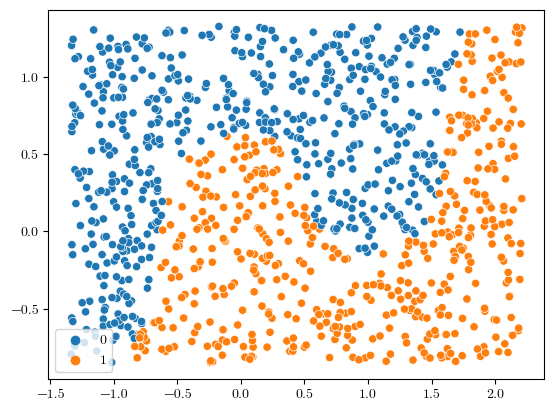

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
num_samples = 1000

x_samples = np.random.uniform(x_min, x_max, num_samples)
y_samples = np.random.uniform(y_min, y_max, num_samples)

samples = np.column_stack((x_samples, y_samples))

svc_target = clf_svc.predict(samples)

sns.scatterplot(x=samples[:, 0], y=samples[:, 1], hue=svc_target, palette='tab10')

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(samples, svc_target, test_size = 0.25, random_state=42)
y_train_new = y_train_new.astype("int64").reshape(-1,1)
y_test_new = y_test_new.astype("int64").reshape(-1,1)

In [ ]:
model_new = Sequential()
model_new.add(Dense(10, input_dim = 2, activation = 'relu'))
model_new.add(Dense(2, activation = 'softmax'))

loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = optimizers.BayesByBackprop()
learning_rate = 0.5

bayes_model_svc_prior = opt.compile(model_new, loss_fn = loss, epochs = 10, learning_rate = learning_rate, kl_weight = 0.1)

This optimizer does not have a default compilation method. Please make sure to call the correct .compile method before use.
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
deepbayes: Using passed loss_fn as the data likelihood in the KL loss


In [ ]:
bayes_model_svc_prior.train(X_train_new, y_train_new, X_test_new, y_test_new)

100%|██████████| 12/12 [00:01<00:00,  9.42it/s]


Epoch 1, loss: 0.909, acc: 0.552, val_loss: 0.628, val_acc: 0.516


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 2, loss: 0.904, acc: 0.593, val_loss: 1.089, val_acc: 0.488


100%|██████████| 12/12 [00:05<00:00,  2.19it/s]


Epoch 3, loss: 0.879, acc: 0.620, val_loss: 1.249, val_acc: 0.480


100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


Epoch 4, loss: 1.105, acc: 0.623, val_loss: 0.776, val_acc: 0.716


100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


Epoch 5, loss: 0.754, acc: 0.724, val_loss: 0.586, val_acc: 0.728


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 6, loss: 0.688, acc: 0.745, val_loss: 0.528, val_acc: 0.640


100%|██████████| 12/12 [00:02<00:00,  4.20it/s]


Epoch 7, loss: 0.728, acc: 0.729, val_loss: 0.484, val_acc: 0.744


100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


Epoch 8, loss: 0.752, acc: 0.685, val_loss: 0.499, val_acc: 0.752


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 9, loss: 0.642, acc: 0.755, val_loss: 0.457, val_acc: 0.800


100%|██████████| 12/12 [00:04<00:00,  2.76it/s]

Epoch 10, loss: 0.692, acc: 0.739, val_loss: 0.582, val_acc: 0.732


In [ ]:
prediction_mean,prediction_variance = my_predict(bayes_model_svc_prior,X_train_new)
print("Prediction Mean: ", prediction_mean)
print("Prediction Variance: ", prediction_variance)

Prediction Mean:  [[0.385154   0.6148459 ]
 [0.7293701  0.2706299 ]
 [0.57244456 0.42755556]
 ...
 [0.38975635 0.6102437 ]
 [0.70619965 0.29380044]
 [0.33369175 0.6663083 ]]
Prediction Variance:  [[0.03588551 0.0358855 ]
 [0.0472076  0.04720759]
 [0.04582796 0.04582796]
 ...
 [0.03149772 0.03149772]
 [0.06858763 0.06858762]
 [0.04503517 0.04503517]]


In [ ]:
bayes_model_svc_prior.save("PosteriorModels/model")
del bayes_model_svc_prior

/usr/local/lib/python3.10/dist-packages/deepbayes/optimizers/bayesbybackprop.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(path+"/mean", np.asarray(self.posterior_mean))
/usr/local/lib/python3.10/dist-packages/deepbayes/optimizers/bayesbybackprop.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(path+"/var", np.asarray(var))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

y_train = y_train.astype("float32").reshape(-1,1)
y_test = y_test.astype("float32").reshape(-1,1)

In [ ]:
retrain_model = PosteriorModel("PosteriorModels/model")

bayes_model = opt.compile(model_new, loss_fn=loss, learning_rate = 0.7, epochs=20)
bayes_model.posterior_mean = retrain_model.posterior_mean.tolist()
bayes_model.posterior_var = retrain_model.posterior_var.tolist()
bayes_model.train(X_train, y_train, X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
BayesKeras detected the above model 
 None
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
deepbayes: Using passed loss_fn as the data likelihood in the KL loss


100%|██████████| 13/13 [00:02<00:00,  6.25it/s]


Epoch 1, loss: 2.821, acc: 0.675, val_loss: 2.938, val_acc: 0.470


100%|██████████| 13/13 [00:01<00:00, 11.06it/s]


Epoch 2, loss: 3.043, acc: 0.661, val_loss: 0.528, val_acc: 0.845


100%|██████████| 13/13 [00:01<00:00, 11.17it/s]


Epoch 3, loss: 2.183, acc: 0.660, val_loss: 3.816, val_acc: 0.470


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 4, loss: 1.992, acc: 0.710, val_loss: 0.746, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 5, loss: 2.192, acc: 0.637, val_loss: 0.577, val_acc: 0.750


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 6, loss: 2.266, acc: 0.723, val_loss: 1.619, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00,  8.78it/s]


Epoch 7, loss: 1.940, acc: 0.711, val_loss: 0.302, val_acc: 0.830


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 8, loss: 1.964, acc: 0.666, val_loss: 1.854, val_acc: 0.470


100%|██████████| 13/13 [00:01<00:00, 11.31it/s]


Epoch 9, loss: 2.508, acc: 0.603, val_loss: 1.682, val_acc: 0.470


100%|██████████| 13/13 [00:01<00:00, 10.26it/s]


Epoch 10, loss: 2.280, acc: 0.679, val_loss: 0.482, val_acc: 0.830


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 11, loss: 2.201, acc: 0.714, val_loss: 1.361, val_acc: 0.810


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 12, loss: 1.884, acc: 0.684, val_loss: 1.094, val_acc: 0.670


100%|██████████| 13/13 [00:01<00:00, 11.24it/s]


Epoch 13, loss: 1.631, acc: 0.754, val_loss: 0.406, val_acc: 0.865


100%|██████████| 13/13 [00:01<00:00, 11.55it/s]


Epoch 14, loss: 2.158, acc: 0.630, val_loss: 2.163, val_acc: 0.470


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 15, loss: 2.124, acc: 0.680, val_loss: 0.502, val_acc: 0.815


100%|██████████| 13/13 [00:01<00:00,  7.71it/s]


Epoch 16, loss: 1.932, acc: 0.710, val_loss: 1.096, val_acc: 0.375


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 17, loss: 2.260, acc: 0.621, val_loss: 0.571, val_acc: 0.785


100%|██████████| 13/13 [00:01<00:00, 11.39it/s]


Epoch 18, loss: 1.991, acc: 0.715, val_loss: 1.037, val_acc: 0.565


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 19, loss: 2.268, acc: 0.733, val_loss: 0.395, val_acc: 0.800


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]

Epoch 20, loss: 2.499, acc: 0.681, val_loss: 0.605, val_acc: 0.655


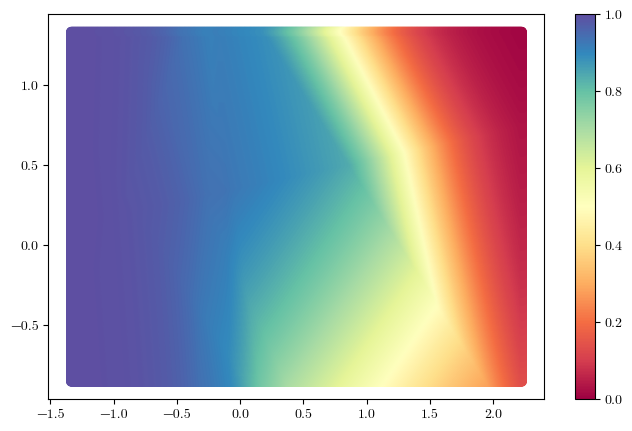

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
num_points = 1000

x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)
X, Y = np.meshgrid(x, y)
samples = np.column_stack((X.flatten(), Y.flatten()))

test2 = bayes_model.predict(samples)
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=test2[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 1)
plt.colorbar(scatter)

In [ ]:
prediction_mean,prediction_variance = my_predict(bayes_model,samples)
print("Prediction Mean: ", prediction_mean)
print("Prediction Variance: ", prediction_variance)

Prediction Mean:  [[0.62088454 0.37911537]
 [0.61943495 0.380565  ]
 [0.6179854  0.38201454]
 ...
 [0.35005397 0.64994603]
 [0.34955266 0.6504473 ]
 [0.3490562  0.6509437 ]]
Prediction Variance:  [[0.1763626  0.17636262]
 [0.17673442 0.17673437]
 [0.17711228 0.17711228]
 ...
 [0.15241057 0.15241057]
 [0.15251087 0.15251085]
 [0.1526092  0.15260918]]


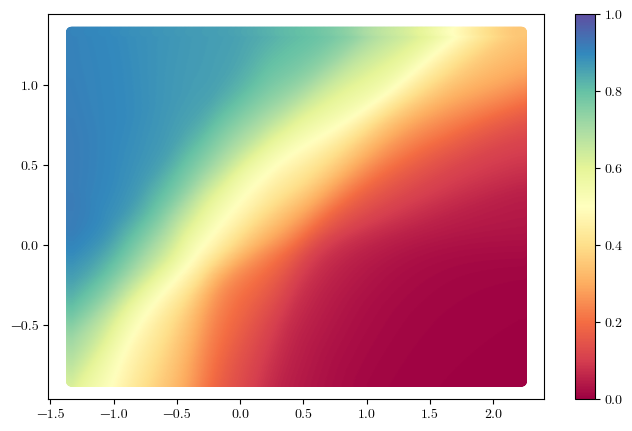

In [ ]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=prediction_mean[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 1)
plt.colorbar(scatter)

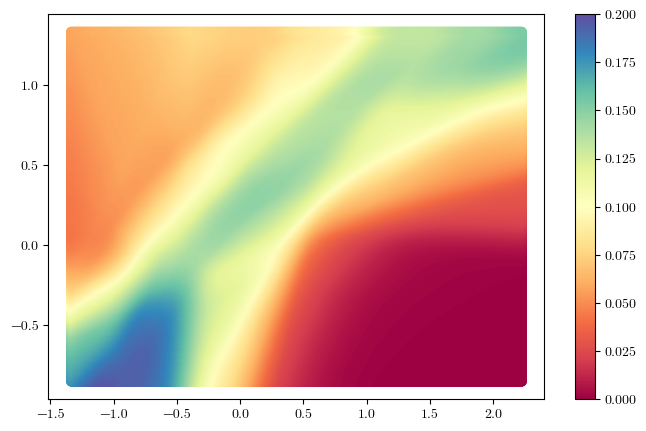

In [ ]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=prediction_variance[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 0.2)
plt.colorbar(scatter)

In [ ]:
test3 = bayes_model.predict(X_test)
test3 = tf.where(test3[:, 0] > test3[:, 1], 0, 1)
test3 = tf.expand_dims(test3, axis=1)
print("Accuracy Score: ", accuracy_score(y_test, test3))

Accuracy Score:  0.725
